# <span style="color:green"> Laboratorio di Simulazione Numerica (LSN) </span>

Nome: Davide Castellani  
Matricola: 967270  
email: davide.castellani1@studenti.unimi.it

## <span style="color:red">  Esercitazione 09</span>

In quest'esercitazione viene risolto numericamente il così detto _Traveling salesman problem_ (TSP). Dato un insieme di città {$\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$} rappresentate dalle loro coordinate bidimensionali, il TSP consiste nel trovare il percorso più breve possibile che le colleghi tutte e ritorni alla città di partenza.  
Il tutto è quindi riconducibile a trovare la permutazione {$\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N$} di città che minimizzi
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
dove $\vec{x}_{N+1}=\vec{x}_1$.

## <span style="color:blue"> Esercizio 09.1 </span>

Per fare ciò si è adottato un Algoritmo Genetico (GA), ovvero un metodo che opera su possibili soluzioni ad un problema di ottimizzazione e ispirandosi a processi genetici, trova quella che fra tutte lo risolve meglio. Sono dunque necessari diversi oggetti:

- i **cromosomi** i.e. una rappresentazione di una possibile soluzione: nel caso del TSP, sono stati scelti dei vettori di int dove ogni numero è associato ad una particolare città. Per es, $\left[0, 1, 3, 5, 4, 2 \right]$: in questo caso sono 6 città, di cui la 0 è quella di partenza che rimane sempre in posizione 0. Ogni vettore dunque è la formalizzazione di un percorso che segue l'ordine delle entrate.

- una **popolazione** di cromosomi, affinché ci sia diversità genetica e si possano ottenere individui nuovi.

- una **funzione costo** i.e. un modo per valutare la bontà di un cromosoma nel risolvere il problema. Nel TSP è stata usata la già introdotta $L^{(1)}$.

- dei metodi di **rinnovo della popolazione**, ovvero delle funzioni che agiscono sui cromosomi, eventualmente modificandoli così da crearne uno nuovo. L'operazione principale è il _crossover_, ma sono state introdotte anche delle mutazioni per introdurre un elemnto di novità al genoma.

### Crossover

L'operazione di crossover implementata si articola come segue:
1. vengono selezionati due cromosomi (madre e padre) con il seguente algoritmo di selezione, che favorisce la scelta dei migliori cromosomi: se P è la dimensione della popolazione e $r$ un numero casule in [0,1),

$$
i= int\big[ (P\cdot r)^3 \big]
$$

2. viene selezionata una posizione in cui tagliare i genitori
3. ogni genitore cerca nel partner le città che gli sono state tagliate e salva l'ordine in cui appaiono
4. vengono selezionati due cromosomi escludendo l'elite del primo quarto di popolazione e vengono sostituiti dalla madre e il padre copiando la prima parte del cromosoma e completandola con le città mancanti secondo l'ordine salvato

### Mutazioni

Le mutazioni introdotte sono:
- PairShuffle: due città di un cromosoma vengono invertite di posizione
- BlockShuffle: due insiemi di città di ugual dimensione appartenenti allo stesso cromosoma vengono invertiti di posizione
- Shift: un insieme di città viene spostato di posizione
- Flip: un cromosoma viene ribaltato

Chiaramente sia le mutazioni che il crossover non devono introdurre cromosomi che non siano più rappresentanti di una possibile soluzione: per questo è stata introdotta una funzione di controllo che al termine di ogni processo di modifica, verifichi che:
1. la città di partenza sia la 0
2. le città vengano visitate tutte e una sola volta, controllando che la somma degli indici delle città sia $\frac{N(N-1)}{2}$

Sono stati condotti due TSP, uno di test con le città disposte circolarmente e uno con le città disposte casualmente all'interno di uno spazio quadrato.

### Disposizione circolare

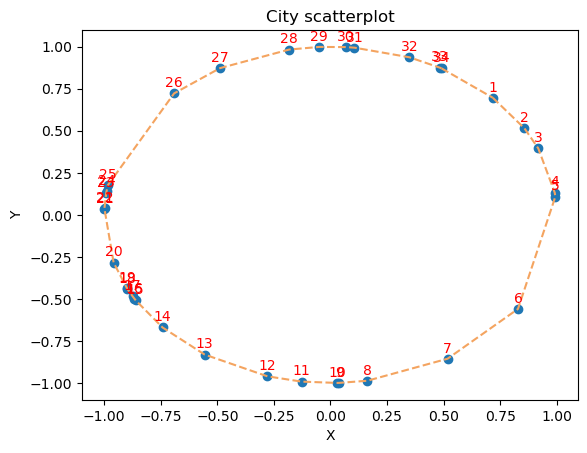

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file
data = np.loadtxt("C.output.out")

# Estrai le colonne x e y
x = data[:, 0]
y = data[:, 1]

# Crea lo scatterplot
plt.scatter(x, y)

# Aggiungi numeri ai punti
for i, (xi, yi) in enumerate(zip(x, y)):
    offset = 0.02
    plt.text(xi, yi+offset, str(i+1), color='red', ha='center', va='bottom')

# Aggiungi segmenti che uniscono i punti in ordine
plt.plot(x, y, '--', color='sandybrown')

# Traccia il segmento che collega l'ultimo punto al primo punto
plt.plot([x[-1], x[0]], [y[-1], y[0]], '--', color='sandybrown')

# Aggiungi etichette agli assi
plt.xlabel("X")
plt.ylabel("Y")

# Aggiungi un titolo al grafico
plt.title("City scatterplot")

# Mostra il grafico
plt.show()

### Disposizione quadrata

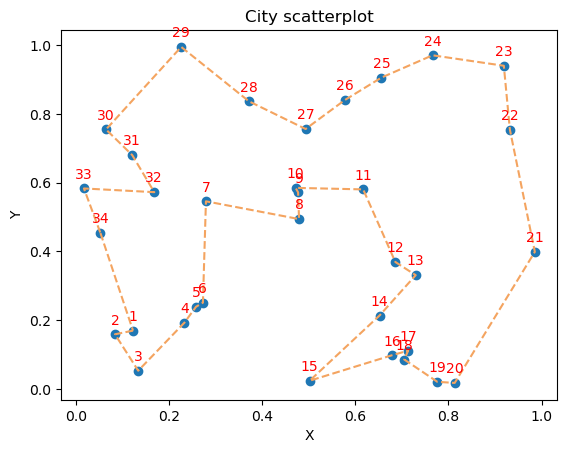

In [2]:
# Carica i dati dal file
data = np.loadtxt("S.output.out")

# Estrai le colonne x e y
x = data[:, 0]
y = data[:, 1]

# Crea lo scatterplot
plt.scatter(x, y)

# Aggiungi numeri ai punti
for i, (xi, yi) in enumerate(zip(x, y)):
    offset = 0.02
    plt.text(xi, yi+offset, str(i+1), color='red', ha='center', va='bottom')

# Aggiungi segmenti che uniscono i punti in ordine
plt.plot(x, y, '--', color='sandybrown')

# Traccia il segmento che collega l'ultimo punto al primo punto
plt.plot([x[-1], x[0]], [y[-1], y[0]], '--', color='sandybrown')

# Aggiungi etichette agli assi
plt.xlabel("X")
plt.ylabel("Y")

# Aggiungi un titolo al grafico
plt.title("City scatterplot")

# Mostra il grafico
plt.show()